In [3]:
# imports
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langchain_cohere import ChatCohere
import getpass
import os
from IPython.display import display, Image

In [ ]:
# setting cohere api key
os.environ["COHERE_API_KEY"] = getpass.getpass()

In [5]:
# setting langchain api key
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_API_KEY"] = getpass.getpass()

In [6]:
# state - to maintain chat history
class State(TypedDict):
    messages : Annotated[list, add_messages]

# graph
graph_builder = StateGraph(State)

# model
llm = ChatCohere(model="command-r")

# node - chatbot
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)

# set entry and finish for graph
graph_builder.set_entry_point("chatbot")
graph_builder.set_finish_point("chatbot")

# graph compilation
graph = graph_builder.compile()

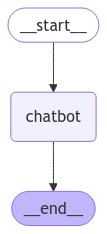

In [9]:
# visualise the graph
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [11]:
# running the chatbot
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print(f"Goodbye!")
        break
    for event in graph.stream({"messages": [("user", user_input)]}):
        for value in event.values():
            print(f"Assistant: {value['messages'][-1].content}")

Assistant: As an AI chatbot, I don't experience emotions like humans do, but I'm functioning properly and ready to assist you in any way I can. How can I help you today? If you're asking about my software, it's running smoothly, and I'm here to provide accurate and helpful responses as always!
Assistant: Harry Potter is a series of seven best-selling novels written by British author J.K. Rowling. The books follow the story of Harry Potter, a young wizard, as he attends Hogwarts School of Witchcraft and Wizardry and becomes entangled in the mysterious and magical world of wizards and mages. 

The series begins with Harry Potter and the Philosopher's Stone, which was published in 1997, and concludes with Harry Potter and the Deathly Hallows, released in 2007. The books have sold more than 500 million copies worldwide and have been translated into over 80 languages. 

The success of the novels led to eight films, produced and released by Warner Bros., which adapted the books with the same